## Topic Modeling of Tweets Related to Istanbul Convention
### Berra Karayel 0054477

In [ ]:
!pip install git+https://github.com/rwalk/gsdmm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-4p0gawc4
  Running command git clone -q https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-4p0gawc4
  Created wheel for gsdmm: filename=gsdmm-0.1-py3-none-any.whl size=4602 sha256=c76e1ab629113fedfc02c4c95b5d9c86c5b2bc56ad36e654dbd4cacee7584a7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-qtnmz2y5/wheels/34/65/a6/7eef67b88abae954fecd22587bd755c27b58a9ffe488d6b0de
Successfully built gsdmm


In [ ]:
import numpy as np 
import pandas as pd

from gsdmm import MovieGroupProcess

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim, spacy
from gensim.models.ldamulticore import LdaMulticore
import re


from gensim.models import Phrases
from gensim.models.phrases import Phraser

In [ ]:
from sklearn.model_selection import GridSearchCV

In [14]:
data = pd.read_csv('/content/Negative-Sentiment-Tweets.csv', encoding='utf-8')
data.head(10)

,Unnamed: 0,Unnamed: 0.1,Date,Tweet,Id,Sentiment
0,0,36621,2022-02-19 08:50:11+00:00,kadın cinayet baş yazmak sebep süre nafakakadı...,1.494957e+18,negative
1,4,50127,2021-03-20 09:26:24+00:00,kadın ölmek doğrusu insan ölmek zaten yasak e ...,1.373204e+18,negative
2,11,10546,2021-03-20 18:55:35+00:00,türkiye tarih i̇stanbul ant yürümek girmek son...,1.373348e+18,negative
3,37,51351,2021-03-20 04:44:45+00:00,kadın şiddet tabiî karşıyımlakın i̇stanbul söz...,1.373133e+18,negative
4,46,19215,2021-03-20 11:05:01+00:00,istanbulsöezleşmesi morardınizmi gulegülemorhalka,1.373229e+18,negative
5,54,8609,2021-03-21 09:46:14+00:00,istanbulsöezleşmesi isim ihanet proje ülke baş...,1.373572e+18,negative
6,55,23713,2021-03-20 09:39:08+00:00,kadın cinayet son yıl katmak artmışyani i̇stan...,1.373207e+18,negative
7,59,33688,2021-03-20 05:15:40+00:00,istanbulsözleşmesi cb karar iptal edilmiştebri...,1.373141e+18,negative
8,64,42796,2021-04-06 15:34:14+00:00,ömer han bey ekonomi alaka söz alt imza atmak ...,1.379457e+18,negative
9,73,38710,2021-09-27 07:08:03+00:00,doğru yanlış eleştirmek doğru yapılanlara karş...,1.442386e+18,negative


In [15]:
data.shape

(510, 6)

In [ ]:
# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [18]:
data['Tweet'] = data.Tweet.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

In [19]:
tokens_tweets = list(sent_to_words(data['Tweet']))

GSDMM

Hyper-parameters of the GSDMM model:

- K = 6. It is the number of clusters. We set this value after several experiments in which we started from 15 clusters. As we increased the number of clusters, the empty clusters started to appear. This was why we settled with 6 clusters. 

Hyperparameters; (These default parameters would work for many short texts.)

- alpha =0.01 1 and beta = 0.01. 

- n_iters = 30.  Number of iteration.

In [20]:
np.random.seed(0) #for reproducability

In [22]:
tokens_tweets = list(sent_to_words(data["Tweet"]))

In [25]:
mgp = MovieGroupProcess(K=15, alpha=0.01, beta=0.01, n_iters=30) 

vocab = set(x for tweet in tokens_tweets for x in tweet)
n_terms = len(vocab)
model = mgp.fit(tokens_tweets, n_terms)

In stage 0: transferred 398 clusters with 15 clusters populated
In stage 1: transferred 196 clusters with 15 clusters populated
In stage 2: transferred 138 clusters with 15 clusters populated
In stage 3: transferred 116 clusters with 15 clusters populated
In stage 4: transferred 99 clusters with 15 clusters populated
In stage 5: transferred 93 clusters with 15 clusters populated
In stage 6: transferred 86 clusters with 15 clusters populated
In stage 7: transferred 82 clusters with 15 clusters populated
In stage 8: transferred 79 clusters with 15 clusters populated
In stage 9: transferred 86 clusters with 15 clusters populated
In stage 10: transferred 76 clusters with 15 clusters populated
In stage 11: transferred 79 clusters with 15 clusters populated
In stage 12: transferred 71 clusters with 15 clusters populated
In stage 13: transferred 75 clusters with 15 clusters populated
In stage 14: transferred 75 clusters with 15 clusters populated
In stage 15: transferred 77 clusters with 15 c

In [26]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [27]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 20)

Number of documents per topic : [18 32 14 36 25 35 37 14 26 29 91 70 24 34 25]

Most important clusters (by number of docs inside): [10 11  6  3  5 13  1  9  8 14  4 12  0  7  2]

Cluster 10 : [('sözleşme', 80), ('stanbul', 58), ('bir', 33), ('olmak', 33), ('kadın', 29), ('hal', 12), ('demek', 12), ('biz', 11), ('desen', 11), ('var', 10), ('vermek', 10), ('iyi', 9), ('slâm', 9), ('kalmak', 9), ('avrupa', 8), ('devlet', 8), ('mi', 8), ('iş', 8), ('yok', 8), ('cinayet', 8)]

Cluster 11 : [('sözleşme', 61), ('kadın', 59), ('stanbul', 52), ('bir', 24), ('olmak', 24), ('var', 20), ('korumak', 19), ('tecavüz', 14), ('mi', 14), ('bu', 13), ('şiddet', 13), ('ülke', 12), ('demek', 12), ('cinayet', 11), ('taciz', 11), ('yok', 9), ('değmek', 9), ('desen', 9), ('kadar', 9), ('hak', 8)]

Cluster 6 : [('sözleşme', 31), ('stanbul', 26), ('kadın', 16), ('chp', 16), ('bir', 10), ('tecavüz', 10), ('taciz', 8), ('iç', 7), ('korumak', 6), ('made', 6), ('nin', 6), ('olmak', 5), ('demek', 5), ('desen', 5), 

In [28]:
gsdmm_clusters = [

[ "Cluster 9 : [('kaybetmek', 826), ('gitmek', 670), ('saymak', 666), ('halk', 665), ('tek', 626), ('seçmen', 603), ('lütfen', 584), ('ben', 560), ('oy', 545), ('insan', 524), ('tayyip', 519), ('kalmak', 496), ('almak', 480), ('göstermek', 473), ('büyük', 467), ('iktidar', 466), ('verecek', 460), ('bakmak', 422), ('gerçek', 414), ('kesinlikle', 406)"],

["Cluster 6 : [('başkan', 885), ('kaybetmek', 878), ('mamoğlu', 794), ('göstermek', 747), ('tek', 692), ('büyük', 649), ('kalmak', 582), ('beledi', 569), ('zaman', 568), ('son', 556), ('ben', 538), ('halk', 531), ('saymak', 499), ('geçmek', 497), ('iktidar', 493), ('gelmek', 463), ('çıkmak', 453), ('gitmek', 431), ('kişi', 429), ('görmek', 428)]"],

["Cluster 12 : [('açıklama', 1605), ('nan', 794), ('lider', 782), ('yi', 540), ('ttifakının', 404), ('iddia', 399), ('aracılığıyla', 364), ('konu', 352), ('başkan', 324), ('yanıt', 296), ('gündem', 283), ('açıklamak', 281), ('verdi', 273), ('soru', 269), ('hak', 260), ('söz', 258), ('haber', 255), ('soru_yanıt', 254), ('tartışmak', 252), ('geçmek', 251)"],

["Cluster 10 : [('kaybetmek', 508), ('tek', 500), ('halk', 463), ('saymak', 419), ('göstermek', 414), ('büyük', 397), ('kişi', 394), ('ben', 390), ('başkan', 381), ('düşünmek', 376), ('geçmek', 369), ('lider', 368), ('almak', 366), ('mamoğlu', 365), ('oy', 363), ('çıkarmak', 360), ('iktidar', 358), ('siyaset', 347), ('gelmek', 342), ('koltuk', 342)"],

["Cluster 2 : [('çıkmak', 455), ('gelmek', 430), ('bakmak', 398), ('bilmek', 370), ('gitmek', 330), ('göstermek', 328), ('zaman', 323), ('söz', 318), ('halk', 315), ('yalan', 309), ('başkan', 304), ('se', 299), ('iş', 294), ('söylemek', 294), ('gün', 292), ('saymak', 272), ('kalmak', 264), ('atatürk', 260), ('baş', 251), ('almak', 242)"],

["Cluster 1 : [('mamoğlu', 654), ('saymak', 613), ('konu', 494), ('ttifakının', 487), ('söylemek', 452), ('açıklama', 447), ('ortak', 437), ('lider', 426), ('bell', 361), ('karar', 355), ('açık', 352), ('son', 350), ('hdp', 344), ('zaman', 328), ('ben', 328), ('tayyip', 324), ('başkan', 323), ('kalmak', 304), ('cumhur', 287), ('masa', 286)"],

["Cluster 7 : [('mamoğlu', 449), ('bakmak', 314), ('gitmek', 308), ('zaman', 307), ('gelmek', 291), ('çıkmak', 259), ('gül', 255), ('kalmak', 253), ('göstermek', 240), ('açık', 240), ('başkan', 220), ('halk', 219), ('baş', 218), ('geçmek', 209), ('gün', 206), ('ben', 200), ('tek', 196), ('bilmek', 193), ('iktidar', 191), ('iş', 190)"],

["Cluster 0 : [('mamoğlu', 381), ('saymak', 373), ('konu', 345), ('gelmek', 331), ('bakmak', 311), ('zaman', 308), ('söylemek', 308), ('ben', 292), ('çıkmak', 282), ('gül', 278), ('hak', 262), ('göstermek', 261), ('halk', 258), ('kişi', 254), ('tek', 250), ('geçmek', 245), ('açık', 239), ('iktidar', 237), ('baş', 234), ('anlamak', 229)"],

["Cluster 5 : [('alevî', 460), ('halk', 369), ('insan', 320), ('iktidar', 298), ('ben', 283), ('konu', 273), ('saymak', 273), ('bakmak', 270), ('doğru', 270), ('zaman', 268), ('gelmek', 263), ('tek', 259), ('iş', 248), ('anlamak', 245), ('kişi', 243), ('siyaset', 239), ('kaybetmek', 236), ('hak', 235), ('görmek', 228), ('bilemek', 222)"],

["Cluster 8 : [('açık', 659), ('se', 418), ('mi', 415), ('bi', 284), ('adayi', 281), ('oray_hazırlamak_mı', 234), ('kasım_ön_yıl_haziran', 229), ('genç_buluşmak', 211), ('icin', 199), ('cok', 165), ('tek', 150), ('ni', 132), ('saymak', 131), ('karar', 130), ('kaybetmek', 128), ('degil', 128), ('si', 126), ('mı_mi', 120), ('ben', 119), ('li', 116)"],

["Cluster 14 : [('se', 226), ('adayi', 173), ('cok', 103), ('ben', 100), ('bi', 98), ('degil', 90), ('halk', 87), ('insan', 79), ('icin', 76), ('beledi', 75), ('son', 70), ('bakmak', 68), ('gitmek', 68), ('türkiye', 68), ('cumhur', 66), ('tek', 66), ('baş', 66), ('görmek', 62), ('gelmek', 60), ('baskan', 60)"],

["Cluster 11 : [('elebaşı_murat_karayılan_ilk', 214), ('terörist_iç_dış_pkk', 213), ('kongre_seçilir_kandili_ttifakı', 209), ('mustafa_atatürk', 142), ('beledi', 141), ('başkan', 138), ('öğretmek', 91), ('hak', 90), ('gün', 84), ('göstermek', 80), ('lider', 79), ('baş', 78), ('yıl', 76), ('çıkmak', 73), ('atatürk', 67), ('son', 66), ('anmak', 63), ('ilk', 62), ('geçmek', 61), ('türk', 60)"],

["Cluster 3 : [('hdp', 193), ('gül', 148), ('nce', 100), ('sorun', 100), ('yemek', 98), ('söylemek', 97), ('gerçek', 83), ('sade', 80), ('alevî', 78), ('bi', 71), ('göstermek', 70), ('küre_çete_kiliçdaroğlu_alevi', 67), ('li_üzeri_reklâm', 67), ('ekip_giz', 67), ('çalışmak_kızmak_numara', 67), ('geçmek', 65), ('yi', 62), ('mi', 61), ('ki', 61), ('bakmak', 60)"],

["Cluster 4 : [('saat_arnavut_meta_görüş', 183), ('saat_arnavut_meclis_düzmek', 182), ('bajram_begaj', 178), ('özel_oturum_iktidar_öneri', 176), ('sorulunca_lgi_cevap_veriyor', 139), ('yönetmek_soy_sorana_lgi', 138), ('zi_lleti_ki_ötmek', 136), ('seçil_komedi', 132), ('gönül', 121), ('nesil_seçmen_anmak', 121), ('lider_inanmak_gazi', 121), ('mustafa_atatürk_çi_syn', 121), ('kiliçdaroğluna_verdi_malesef_seçi', 121), ('kaybetti_ni_karşi_sakin', 121), ('olmayin', 121), ('başkan', 114), ('sahip', 102), ('geçmek', 101), ('halk_hizmet_iddasına', 85), ('gerçek_devlet_idare', 85)"],

["Cluster 13 : [('açık', 176), ('büyük', 143), ('çalışmak', 138), ('er', 126), ('engel', 98), ('konuşmak_mi_şiniz', 97), ('güç_palavra_paşa_paşa', 97), ('çıkmak', 91), ('kafa', 86), ('göstermek', 83), ('düşünce_koltuk_korumak', 77), ('bilemek', 75), ('atatürk_cumhuriyet_öç', 74), ('ön', 73), ('beyin_kafa_bulanık', 73), ('kaybetmek', 71), ('tek', 67), ('hemen', 67), ('hata', 64), ('zaman', 58)]"]
    
]

In [29]:
gsdmm_clusters = pd.DataFrame.from_dict(gsdmm_clusters)

In [30]:
gsdmm_clusters

,0
0,"Cluster 9 : [('kaybetmek', 826), ('gitmek', 67..."
1,"Cluster 6 : [('başkan', 885), ('kaybetmek', 87..."
2,"Cluster 12 : [('açıklama', 1605), ('nan', 794)..."
3,"Cluster 10 : [('kaybetmek', 508), ('tek', 500)..."
4,"Cluster 2 : [('çıkmak', 455), ('gelmek', 430),..."
5,"Cluster 1 : [('mamoğlu', 654), ('saymak', 613)..."
6,"Cluster 7 : [('mamoğlu', 449), ('bakmak', 314)..."
7,"Cluster 0 : [('mamoğlu', 381), ('saymak', 373)..."
8,"Cluster 5 : [('alevî', 460), ('halk', 369), ('..."
9,"Cluster 8 : [('açık', 659), ('se', 418), ('mi'..."


In [31]:
gsdmm_clusters.columns

RangeIndex(start=0, stop=1, step=1)

In [32]:
gsdmm_clusters.rename(columns={0: "Dominant Keywords for GSDMM Clusters"}, inplace=True)

In [33]:
type(gsdmm_clusters)

pandas.core.frame.DataFrame

In [34]:
gsdmm_clusters.columns

Index(['Dominant Keywords for GSDMM Clusters'], dtype='object')

In [35]:
gsdmm_clusters[['Cluster No.(Importance)','Dominant Keywords:GSDMM']] = gsdmm_clusters["Dominant Keywords for GSDMM Clusters"].str.split(":",expand=True,)
gsdmm_clusters

,Dominant Keywords for GSDMM Clusters,Cluster No.(Importance),Dominant Keywords:GSDMM
0,"Cluster 9 : [('kaybetmek', 826), ('gitmek', 67...",Cluster 9,"[('kaybetmek', 826), ('gitmek', 670), ('sayma..."
1,"Cluster 6 : [('başkan', 885), ('kaybetmek', 87...",Cluster 6,"[('başkan', 885), ('kaybetmek', 878), ('mamoğ..."
2,"Cluster 12 : [('açıklama', 1605), ('nan', 794)...",Cluster 12,"[('açıklama', 1605), ('nan', 794), ('lider', ..."
3,"Cluster 10 : [('kaybetmek', 508), ('tek', 500)...",Cluster 10,"[('kaybetmek', 508), ('tek', 500), ('halk', 4..."
4,"Cluster 2 : [('çıkmak', 455), ('gelmek', 430),...",Cluster 2,"[('çıkmak', 455), ('gelmek', 430), ('bakmak',..."
5,"Cluster 1 : [('mamoğlu', 654), ('saymak', 613)...",Cluster 1,"[('mamoğlu', 654), ('saymak', 613), ('konu', ..."
6,"Cluster 7 : [('mamoğlu', 449), ('bakmak', 314)...",Cluster 7,"[('mamoğlu', 449), ('bakmak', 314), ('gitmek'..."
7,"Cluster 0 : [('mamoğlu', 381), ('saymak', 373)...",Cluster 0,"[('mamoğlu', 381), ('saymak', 373), ('konu', ..."
8,"Cluster 5 : [('alevî', 460), ('halk', 369), ('...",Cluster 5,"[('alevî', 460), ('halk', 369), ('insan', 320..."
9,"Cluster 8 : [('açık', 659), ('se', 418), ('mi'...",Cluster 8,"[('açık', 659), ('se', 418), ('mi', 415), ('b..."


In [36]:
# We didn`t rename the clusters

topic_dict = {}
topic_names = ['type 1',
               'type 2',
               'type 3',
               'type 4',
               'type 5',
               'type 6',
               'type 7',
               'type 8',
               'type 9',
               'type 10',
               'type 11',
               'type 12',
               'type 13',
               'type 14',
               'type 15'
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

In [41]:
def create_topics_dataframe(data_text=data.Tweet,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_tweets):
    result = pd.DataFrame(columns=['Text', 'Topic', 'Rating', 'Lemma-text'])
    for i, text in enumerate(data_text):
        result.at[i, 'Text'] = text
        #result.at[i, 'Rating'] = data.Rating[i]
        result.at[i, 'Lemma-text'] = lemma_text[i]
        prob = mgp.choose_best_label(tokens_tweets[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [42]:
result = create_topics_dataframe(data_text=data.Tweet, mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_tweets)
result.head(5)

,Text,Topic,Rating,Lemma-text
0,kadın cinayet baş yazmak sebep süre nafakakadı...,type 9,NaN,"[kadın, cinayet, baş, yazmak, sebep, süre, naf..."
1,kadın ölmek doğrusu insan ölmek zaten yasak e ...,type 4,NaN,"[kadın, ölmek, doğrusu, insan, ölmek, zaten, y..."
2,türkiye tarih i̇stanbul ant yürümek girmek son...,type 5,NaN,"[türkiye, tarih, stanbul, ant, yürümek, girmek..."
3,kadın şiddet tabiî karşıyımlakın i̇stanbul söz...,type 2,NaN,"[kadın, şiddet, tabiî, karşıyımlakın, stanbul,..."
4,istanbulsöezleşmesi morardınizmi gulegülemorhalka,Other,NaN,[morardınizmi]


# Visualization for the GSDM model


In [43]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import plotly.express as px

fig = px.pie(result, names='Topic',  title='Topics', color_discrete_sequence=px.colors.sequential.Burg)
fig.show()

In [45]:
result['len'] = result.Text.apply(lambda row: len(row.split()))
result.head()

,Text,Topic,Rating,Lemma-text,len
0,kadın cinayet baş yazmak sebep süre nafakakadı...,type 9,NaN,"[kadın, cinayet, baş, yazmak, sebep, süre, naf...",22
1,kadın ölmek doğrusu insan ölmek zaten yasak e ...,type 4,NaN,"[kadın, ölmek, doğrusu, insan, ölmek, zaten, y...",36
2,türkiye tarih i̇stanbul ant yürümek girmek son...,type 5,NaN,"[türkiye, tarih, stanbul, ant, yürümek, girmek...",26
3,kadın şiddet tabiî karşıyımlakın i̇stanbul söz...,type 2,NaN,"[kadın, şiddet, tabiî, karşıyımlakın, stanbul,...",16
4,istanbulsöezleşmesi morardınizmi gulegülemorhalka,Other,NaN,[morardınizmi],3


In [46]:
import matplotlib.pyplot as plt

## WordClouds

In [47]:
result['Lemma_text'] = result['Lemma-text'].apply(lambda row: ' '.join(row))

In [48]:
result = result.drop('Lemma-text', axis=1)

In [49]:
from wordcloud import WordCloud 

In [50]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15
                         ).generate(" ".join(data.values))
                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

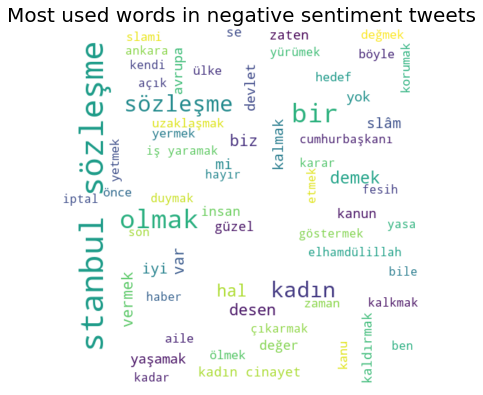

In [51]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 1'], title="Most used words in negative sentiment tweets")

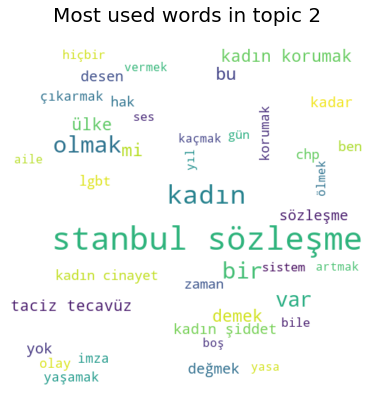

In [52]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 2'], title="Most used words in topic 2")

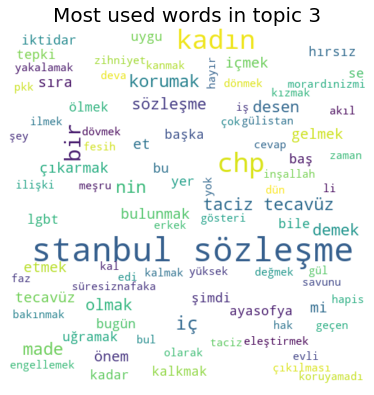

In [53]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 3'], title="Most used words in topic 3")

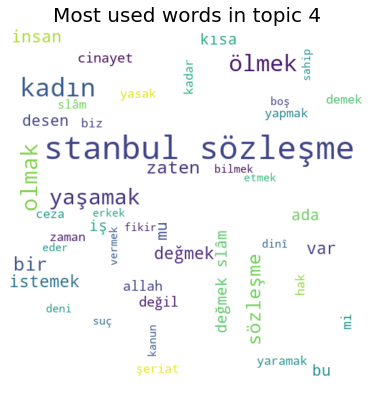

In [54]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 4'], title="Most used words in topic 4")

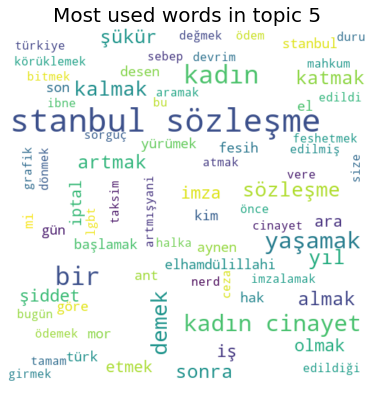

In [55]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 5'], title="Most used words in topic 5")

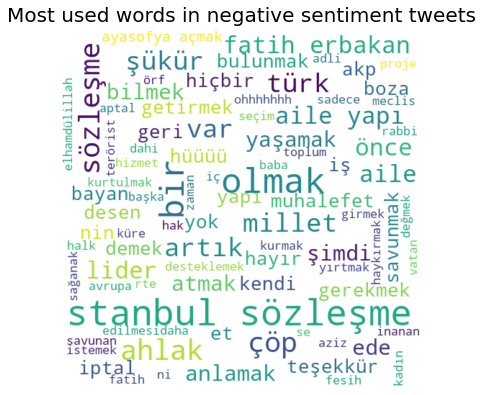

In [58]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 6'], title="Most used words in negative sentiment tweets")

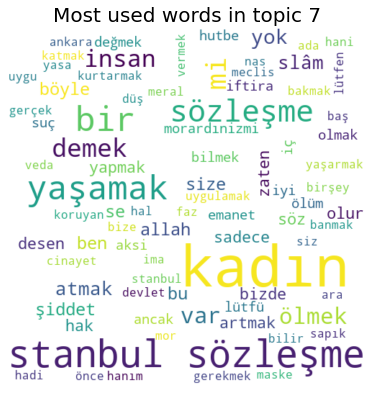

In [57]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 7'], title="Most used words in topic 7")

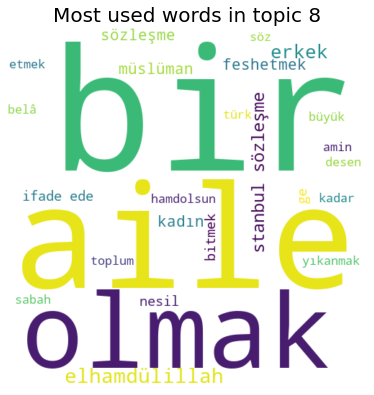

In [62]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 8'], title="Most used words in topic 8")

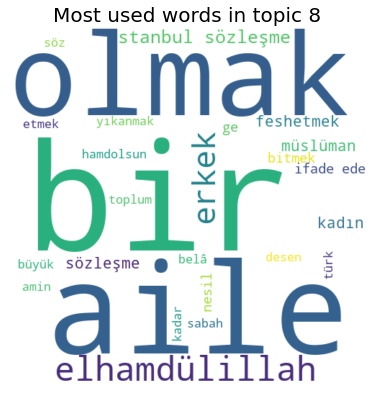

In [63]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 8'], title="Most used words in topic 8")

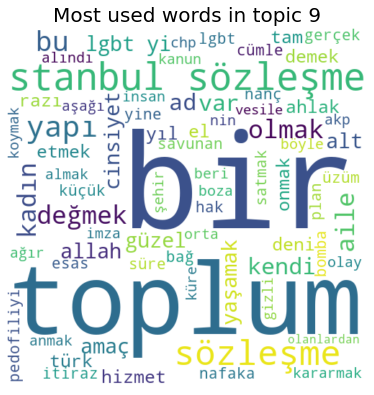

In [64]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 9'], title="Most used words in topic 9")

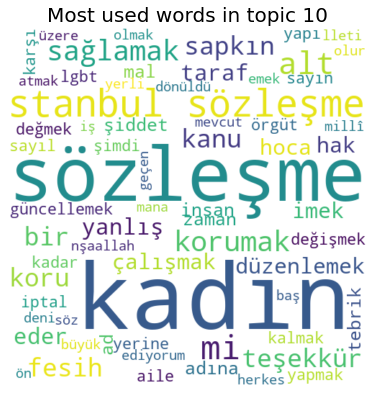

In [65]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 10'], title="Most used words in topic 10")

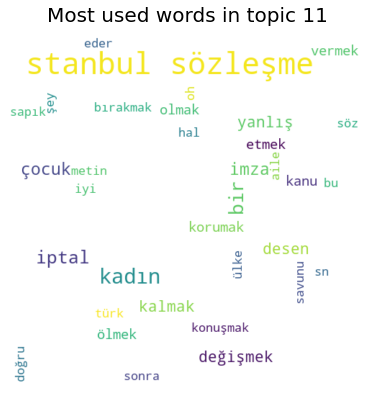

In [66]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 11'], title="Most used words in topic 11")

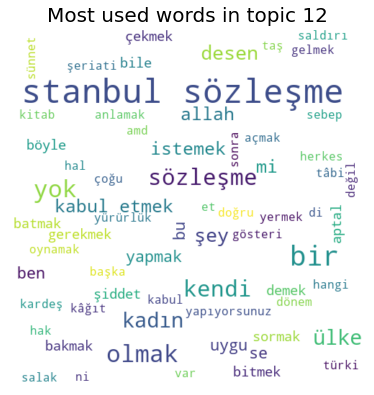

In [67]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 12'], title="Most used words in topic 12")

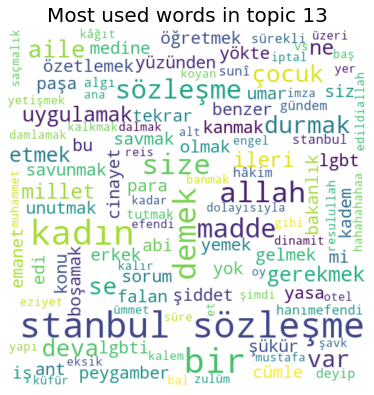

In [68]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 13'], title="Most used words in topic 13")

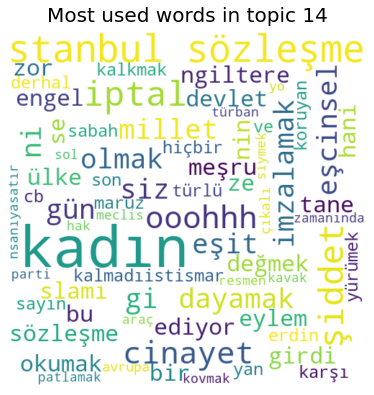

In [69]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 14'], title="Most used words in topic 14")

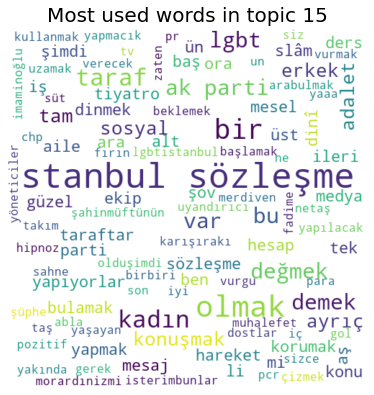

In [70]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 15'], title="Most used words in topic 15")

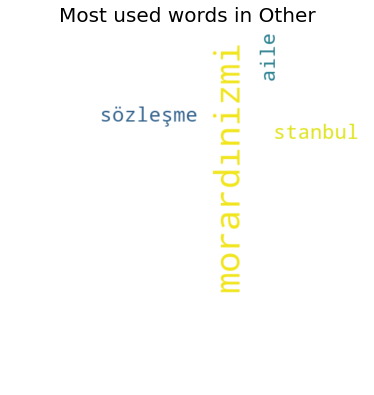

In [71]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'Other'], title="Most used words in Other")